# DERBi PIE Semantics Module

In [56]:
# installing modules below:

In [55]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install gutenbergpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
#importing modules below:

In [10]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-100')

In [11]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
from pprint import pprint

In [15]:
import numpy as np

In [16]:
from scipy import spatial

In [17]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [18]:
import gutenbergpy.textget

In [19]:
import matplotlib.pyplot as plt

In [20]:
from tabulate import tabulate

In [21]:
from sklearn.manifold import TSNE

In [58]:
import plotly.express as px

In [63]:
import os

In [59]:
# creating a getbook function for Project Gutenberg
def getbook(book, outfile):
  """
  Download a book from project Gutenberg and save it 
  to the specified outfile
  """
  print(f"Downloading Project Gutenberg ID {book}")
  raw_book = gutenbergpy.textget.get_text_by_id(book)
  clean_book = gutenbergpy.textget.strip_headers(raw_book)
  if not outfile:
    outfile = f'{book}.txt'
    print(f"Saving book as {outfile}")
  with open(outfile, 'wb') as file:
    file.write(clean_book)
    file.close()

In [79]:
# creating a directory path to store PG texts
directory_path = os.path.join(os.environ['USERPROFILE'],'derbipie-semantics','texts')
print(directory_path)

C:\Users\gpwal\derbipie-semantics\texts


In [84]:
# these are Project Gutenberg IDs and information
caesar_ids = [218, 18837, 29645]
caesar_files = [f"{x}.txt" for x in caesar_ids]
caesar_titles = ["Bello Gallico I-IV", "Bello Gallico V-VII", "The Gate to Caesar"]
cicero_ids = [14970, 226, 47001]
cicero_files = [f"{x}.txt" for x in cicero_ids]
cicero_titles = ["Academia", "Orations", "De Officiis"]

In [85]:
# downloading Project Gutenberg texts
foo = [getbook(x, f"{x}.txt" in directory_path) for x in caesar_ids]
foo = [getbook(x, f"{x}.txt" in directory_path) for x in cicero_ids]

Saving book as 218.txt
Saving book as 18837.txt
Saving book as 29645.txt
Saving book as 14970.txt
Saving book as 226.txt
Saving book as 47001.txt


In [91]:
def get_unigram_counts(path):
  """
    Given a path, generate a counter dictionary of unigrams
  """
  with open(path, 'r', encoding="utf-8") as f:
    text = f.read()
  text = text.replace("\n", " ").lower()
  unigrams = RegexpTokenizer(r"\w+").tokenize(text)
  count = Counter(unigrams)
  return(count)

In [90]:
# creating a function to count the instances of words in texts
def get_term_count(book_dict, term):
  """
    return a list of the number of times a term has appeared
    in a book
  """
  out = [book_dict[book][term] for book in book_dict]
  return(out)

In [86]:
caesar_words = {k:get_unigram_counts(v) 
                    for k, v in zip(caesar_titles, caesar_files)}
cicero_words = {k:get_unigram_counts(v) 
                    for k, v in zip(cicero_titles, cicero_files)}

In [92]:
# counting the number of times 'ego' and 'magnus' appear in the texts downloaded from PG
ego = ["ego"] + \
          get_term_count(caesar_words, "ego") + \
          get_term_count(cicero_words, "ego")
magnus  = ["magnus"] + \
          get_term_count(caesar_words, "magnus") + \
          get_term_count(cicero_words, "magnus")

In [93]:
print(ego)
print(magnus)

['ego', 1, 4, 1, 29, 61, 10]
['magnus', 0, 10, 0, 4, 0, 5]


In [103]:
# preparing Bello Gallico I-IV for NLP by tokenizing it and removing stop words
with open (f"{directory_path}/218.txt", 'r') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
corpus = [[w for w in sent if not w in stopwords.words('latin.txt')] for sent in sent_word]
pprint(corpus[10:12])

[['id',
  'facilius',
  'iis',
  'persuasit',
  'undique',
  'loci',
  'natura',
  'helvetii',
  'continentur',
  'una',
  'parte',
  'flumine',
  'rheno',
  'latissimo',
  'altissimo',
  'agrum',
  'helvetium',
  'germanis',
  'dividit',
  'altera',
  'parte',
  'monte',
  'iura',
  'altissimo',
  'inter',
  'sequanos',
  'helvetios',
  'tertia',
  'lacu',
  'lemanno',
  'flumine',
  'rhodano',
  'provinciam',
  'nostram',
  'helvetiis',
  'dividit'],
 ['his',
  'fiebat',
  'minus',
  'late',
  'vagarentur',
  'minus',
  'facile',
  'finitimis',
  'bellum',
  'inferre',
  'possent',
  'parte',
  'homines',
  'bellandi',
  'cupidi',
  'magno',
  'dolore',
  'adficiebantur']]


In [34]:
# finding the most similar words to 'venire' in Bello Gallico I-IV
model = Word2Vec(sentences = corpus, 
                 vector_size = 100, 
                 window = 2,
                 epochs = 100)

In [35]:
print(
  tabulate(
    model.wv.most_similar("venire")
  )
)

----------  --------
fecisset    0.780948
imperio     0.777007
dicere      0.733137
gratiam     0.719851
venisse     0.709572
oportere    0.692129
imperium    0.690305
causam      0.682865
poterat     0.648716
potestatem  0.642224
----------  --------


In [104]:
# getting all of the word vectors in BGI-IV and plotting them
bellogallico1_matrix = model.wv.get_normed_vectors()

In [105]:
bellogallico1_matrix.shape

(675, 100)

In [106]:
tsne = TSNE(n_components=2, perplexity = 5)
projections = tsne.fit_transform(bellogallico1_matrix)

In [107]:
vocab = model.wv.index_to_key

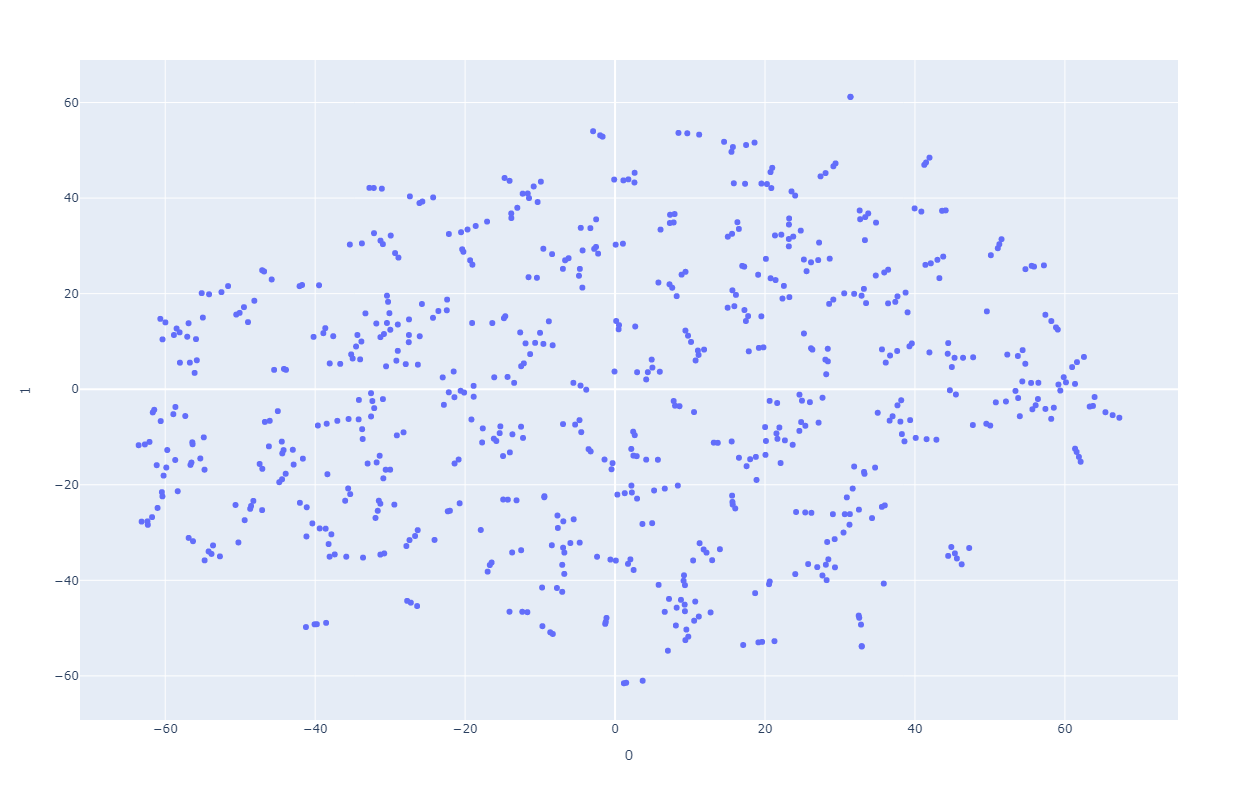

In [108]:
fig = px.scatter(
    projections, 
    x=0, y=1,
    hover_name = np.array(vocab),
    width=800, 
    height=800
)
fig.show()

In [ ]:
# creating similar plots for the other languages below:

In [109]:
sri_vishnu_files = [f"{directory_path}/sri_vishnu.txt"]
sri_vishnu_titles = [f"{directory_path}/sri_vishnu.txt"]

In [110]:
sri_vishnu_words = {k:get_unigram_counts(v) 
                    for k, v in zip(sri_vishnu_files, sri_vishnu_titles)}

In [111]:
with open(f'{directory_path}/sri_vishnu.txt') as sri_vishnu:
    lines = [line.strip() for line in sri_vishnu]
    mahant = ["mahant"] + \
          get_term_count(sri_vishnu_words, "mahant")
    phal  = ["phal"] + \
          get_term_count(sri_vishnu_words, "phal")

In [112]:
print(mahant)
print(phal)

['mahant', 0]
['phal', 0]


In [113]:
with open (f"{directory_path}/sri_vishnu.txt", 'r') as f:
  text = f.read()
  
text = text.replace("\n", " ").lower()
sentences = sent_tokenize(text)
sent_word = [RegexpTokenizer(r"\w+").tokenize(sent) for sent in sentences]
corpus = [[w for w in sent if not w in stopwords.words('latin.txt')] for sent in sent_word]
pprint(corpus[10:12])

[]


In [115]:
# attempting to use a Sanskirt Swadesh word in this cell to find similar-in-meaning words, but many do not appear in the text
print(
  tabulate(
    model.wv.most_similar("niht")
  )
)

KeyError: "Key 'niht' not present in vocabulary"